In [1]:
import pandas as pd
import numpy as np
from calculator import *
from numpy import random
from math import pi
import turtle as tt
import matplotlib.cm as cm
from tqdm import tqdm
import matplotlib.pyplot as plt
import statsmodels.api
import pandas as pd
import pingouin as pg
from statsmodels.tsa.stattools import *
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
from sklearn import linear_model

In [8]:
arsenic = pd.read_csv("data/arsenic.csv")
copper = pd.read_csv("data/copper.csv")
sulfate = pd.read_csv("data/sulfate.csv")
boron = pd.read_csv("data/boran.csv")
chloride = pd.read_csv("data/chloride.csv")
molybdenum = pd.read_csv("data/molybdenum.csv")
vanadium = pd.read_csv("data/vanadium.csv")
fluoride = pd.read_csv("data/fluoride.csv")
# iron = pd.read_csv("data/iron.csv")
# uranium = pd.read_csv("data/uranium.csv")

In [110]:
vanadium.describe()

,WellDepth,Time,SampleNumber,EntityId,LabId,ReliabilityId,LatitudeDD,LongitudeDD,ParameterCode,ParameterValue,PlusMinus
count,2200.000000,2243.000000,2243.000000,2243.000000,2243.000000,2241.000000,2243.000000,2243.000000,2243.0,2243.000000,0.0
mean,1063.632727,1213.478377,1.000446,1.879180,21.461436,7.023650,30.499593,-96.998081,1085.0,3.124730,NaN
std,917.216781,259.505701,0.021115,3.080416,5.885293,0.757034,1.579765,1.847644,0.0,5.342715,NaN
min,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,27.474722,-100.214723,1085.0,1.000000,NaN
25%,448.250000,1015.000000,1.000000,1.000000,23.000000,7.000000,29.005356,-98.632083,1085.0,1.000000,NaN
50%,753.500000,1207.000000,1.000000,1.000000,23.000000,7.000000,30.628972,-96.906667,1085.0,1.000000,NaN
75%,1350.000000,1425.000000,1.000000,1.000000,23.000000,7.000000,31.941667,-95.344445,1085.0,2.000000,NaN
max,6211.000000,1845.000000,2.000000,16.000000,24.000000,14.000000,33.443611,-93.776667,1085.0,42.200000,NaN


In [111]:
# arsenic_df = pre_process(arsenic,["arsenic"],thres = 2.75)
# copper_df = pre_process(copper,["copper"],thres = 4.91)
# sulfate_df = pre_process(sulfate,["sulfate"],thres = 60.34)
# boron_df = pre_process(boron,["boron"],thres = 418.79)
# chloride_df = pre_process(chloride,["chloride"],thres = 96.95)
# molybdenum_df = pre_process(molybdenum,["molybdenum"],thres = 2.87)
# vanadium_df = pre_process(vanadium,["vanadium"], thres = 3.12)
eps = 1e-5
arsenic_df = pre_process(arsenic,["arsenic"],thres = 2)
copper_df = pre_process(copper,["copper"],thres = 2)
sulfate_df = pre_process(sulfate,["sulfate"],thres = 28.6)
boron_df = pre_process(boron,["boron"],thres = 200)
chloride_df = pre_process(chloride,["chloride"],thres = 34.8)
molybdenum_df = pre_process(molybdenum,["molybdenum"],thres = 1)
vanadium_df = pre_process(vanadium,["vanadium"], thres = 1)
fluoride_df = pre_process(fluoride,["fluoride"],thres = 0.28)
# iron_df = pre_process(iron,["iron"],thres = 170-eps)
# eps=10e-5
# arsenic_df = pre_process(arsenic,["arsenic"],thres = 10/3-eps)
# copper_df = pre_process(copper,["copper"],thres = 1.3/3-eps)
# sulfate_df = pre_process(sulfate,["sulfate"],thres = 250/3-eps)
# boron_df = pre_process(boron,["boron"],thres = 5/3-eps)
# chloride_df = pre_process(chloride,["chloride"],thres = 21/3-eps)
# molybdenum_df = pre_process(molybdenum,["molybdenum"],thres = 40/3-eps)
# vanadium_df = pre_process(vanadium,["vanadium"], thres = 4/3-eps)

In [112]:
fluoride_df.head()

,StateWellNumber,Date,LatitudeDD,LongitudeDD,ParameterValue,type
433,3709505,20020304,31.825833,-94.918889,0.35,fluoride
532,3735701,20020305,31.398889,-94.726944,0.53,fluoride
538,3735904,20020305,31.386945,-94.646667,0.34,fluoride
454,3713407,20020306,31.832222,-94.479722,0.38,fluoride
517,3734505,20020306,31.421389,-94.803333,0.32,fluoride


In [113]:
# typess = [["zero_arsenic","moderate_arsenic",'high_arsenic'],["zero_copper","moderate_copper",'high_copper'],\
#          ["zero_sulfate","moderate_sulfate",'high_sulfate'],["zero_boran","moderate_boran",'high_boran'],\
#          ["zero_chloride","moderate_chloride",'high_chloride'],["zero_molybdenum","moderate_molybdenum",'high_molybdenum'],\
#          ["zero_vanadium","moderate_vanadium",'high_vanadium']]
typess = ["arsenic","copper","sulfate","boron","chloride","molybdenum","vanadium","fluoride"]
l = [arsenic_df,copper_df,sulfate_df,boron_df,chloride_df,molybdenum_df,vanadium_df,fluoride_df]

In [114]:
df = get_dates(arsenic)
df['year'] =  df['Date']/10000
df['year'] = df['year'].astype('int')
df = df[df['year']==2002]
date1 = df['Date']

df = get_dates(vanadium)
df['year'] =  df['Date']/10000
df['year'] = df['year'].astype('int')
df = df[df['year']==2002]
date2 = df['Date']

dates = np.intersect1d(date1,date2)
dates = dates[dates<=20020801]

In [115]:
dates

array([20020304, 20020305, 20020306, 20020307, 20020311, 20020312,
       20020313, 20020314, 20020318, 20020319, 20020320, 20020325,
       20020326, 20020327, 20020328, 20020329, 20020401, 20020408,
       20020409, 20020410, 20020411, 20020412, 20020415, 20020416,
       20020417, 20020418, 20020422, 20020423, 20020424, 20020425,
       20020506, 20020507, 20020508, 20020509, 20020513, 20020514,
       20020515, 20020516, 20020517, 20020520, 20020521, 20020522,
       20020523, 20020528, 20020529, 20020530, 20020603, 20020604,
       20020611, 20020612, 20020613, 20020614, 20020617, 20020619,
       20020620, 20020621, 20020624, 20020625, 20020626, 20020627,
       20020701, 20020708, 20020709, 20020710, 20020711, 20020712,
       20020715, 20020716, 20020717, 20020718, 20020719, 20020722,
       20020723, 20020724, 20020725, 20020729])

In [116]:
len(dates)

76

In [117]:
sum_vec=[]
for i in range(len(l)):
    l[i] = vectorize(l[i],typess[i],dates=dates)
    if i==0:
        sum_vec = l[0]
    if i>=1:
        sum_vec = add_vectorization(sum_vec,l[i])

In [118]:
## todo 
## sum_vec is a list of dataframe with len 92
## i-th dataframe contains all the objects on date i
sum_vec[1]

,type,x,y
0,copper,-94.665001,31.763889
1,copper,-94.646667,31.386945
2,copper,-94.616112,31.718889
3,copper,-94.726944,31.398889
4,sulfate,-94.646667,31.386945
5,sulfate,-94.726944,31.398889
6,boron,-94.616112,31.718889
7,boron,-94.726944,31.398889
8,boron,-94.670556,31.438611
9,boron,-94.646667,31.386945


In [119]:
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(1,len(s)+1))

In [120]:
list(powerset([1,2,3]))

[(1,), (2,), (3,), (1, 2), (1, 3), (2, 3), (1, 2, 3)]

In [121]:
    colo = list(powerset(typess))[10]
    print(colo)
    PI = []
    for date in range(len(dates)):
        if not (all(x in list(sum_vec[date]['type']) for x in list(colo))):
            print(list(sum_vec[date]['type'].unique()))

('arsenic', 'boron')
['sulfate', 'boron', 'vanadium', 'fluoride']
['copper', 'sulfate', 'boron', 'vanadium', 'fluoride']
['copper', 'sulfate', 'boron', 'chloride', 'vanadium', 'fluoride']
['sulfate', 'boron', 'fluoride']
['copper', 'sulfate', 'boron', 'chloride', 'fluoride']
['sulfate', 'boron', 'vanadium']
['copper', 'boron', 'chloride', 'vanadium', 'fluoride']
['copper']
['copper', 'sulfate']
['copper', 'boron', 'vanadium']
['copper', 'sulfate']
['sulfate', 'boron', 'chloride', 'vanadium', 'fluoride']
['copper', 'sulfate', 'boron', 'chloride', 'vanadium', 'fluoride']
['copper', 'sulfate', 'chloride', 'vanadium']
['copper', 'boron', 'chloride', 'fluoride']
['copper', 'sulfate', 'boron', 'molybdenum', 'vanadium', 'fluoride']
['copper', 'sulfate', 'boron', 'chloride', 'molybdenum', 'vanadium', 'fluoride']
['copper', 'sulfate', 'boron', 'chloride', 'molybdenum', 'vanadium', 'fluoride']
['copper', 'sulfate', 'boron', 'chloride', 'molybdenum', 'vanadium', 'fluoride']
['copper', 'sulfate', 

In [123]:
# first find colocation pattern
thres = 0.5
patterns = []
num_colos = dict()
diff_colos = dict()
PIs = [] 
PI_df = pd.DataFrame()
colo_df = pd.DataFrame()
for colo in list(powerset(typess)):
    PI = []
    num_colo = []
    for date in range(len(dates)):
        if not (all(x in list(sum_vec[date]['type']) for x in list(colo))):
            PI.append(0)
            num_colo.append(0)
            continue
        arr=sum_vec[date].to_numpy()
        dic=get_dict(arr,key_idx=0)
        colo_array=get_colocations(dic,colo_type=list(colo),thres=0.001)
        if colo_array is None: 
            num_colo.append(0)
        else: 
            num_colo.append(len(colo_array))
        PI.append(get_modified_part_index(dic,colo_type=list(colo),colo_arr=colo_array))
    if np.mean(PI)>=thres:
        #print(colo)
        PI_df[str(colo)] = PI
        colo_df[str(colo)] = num_colo
        print("{} with PI = {}".format(str(colo),np.mean(PI)))
        PIs.append(np.mean(PI))
        patterns.append(colo)
        num_colos[str(colo)] = num_colo
        diff_colo = np.array(num_colo[1:])-np.array(num_colo[:-1])
        diff_colos[str(colo)] = diff_colo
patterns

('copper',) with PI = 0.8289473684210527
('sulfate',) with PI = 0.8552631578947368
('boron',) with PI = 0.9078947368421053
('chloride',) with PI = 0.7894736842105263
('molybdenum',) with PI = 0.5263157894736842
('vanadium',) with PI = 0.6710526315789473
('fluoride',) with PI = 0.7894736842105263
('copper', 'boron') with PI = 0.6884502923976609
('copper', 'chloride') with PI = 0.6148026315789473
('copper', 'fluoride') with PI = 0.5736842105263158
('sulfate', 'boron') with PI = 0.6531798245614034
('sulfate', 'chloride') with PI = 0.5270833333333332
('boron', 'chloride') with PI = 0.7504751461988304
('boron', 'vanadium') with PI = 0.6197368421052631
('boron', 'fluoride') with PI = 0.7426378446115288
('chloride', 'fluoride') with PI = 0.5894423558897244
('copper', 'boron', 'chloride') with PI = 0.5928728070175439
('copper', 'boron', 'fluoride') with PI = 0.5671052631578948
('sulfate', 'boron', 'chloride') with PI = 0.500767543859649
('boron', 'chloride', 'fluoride') with PI = 0.59602130325

[('copper',),
 ('sulfate',),
 ('boron',),
 ('chloride',),
 ('molybdenum',),
 ('vanadium',),
 ('fluoride',),
 ('copper', 'boron'),
 ('copper', 'chloride'),
 ('copper', 'fluoride'),
 ('sulfate', 'boron'),
 ('sulfate', 'chloride'),
 ('boron', 'chloride'),
 ('boron', 'vanadium'),
 ('boron', 'fluoride'),
 ('chloride', 'fluoride'),
 ('copper', 'boron', 'chloride'),
 ('copper', 'boron', 'fluoride'),
 ('sulfate', 'boron', 'chloride'),
 ('boron', 'chloride', 'fluoride')]

In [124]:
len(patterns)

20

In [105]:
tt = ["('boron',)","('arsenic',)"]

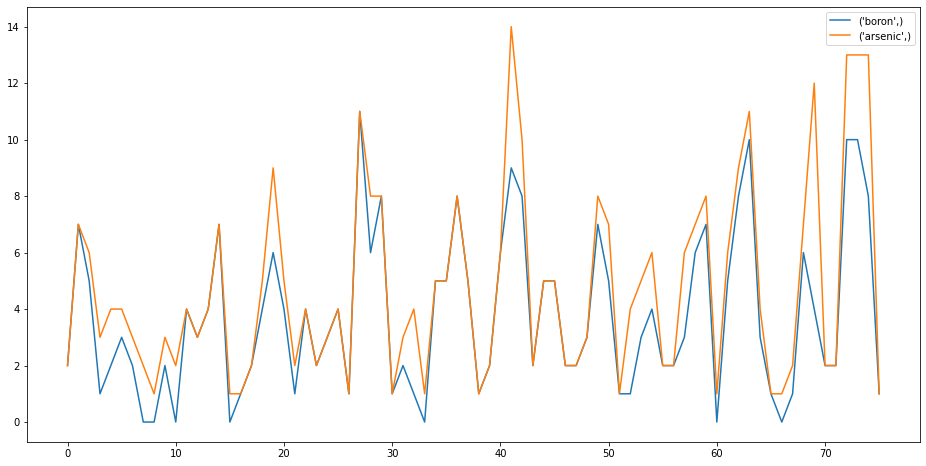

In [108]:
plt.figure(figsize = (16,8))
for colo in list(tt):
#     ar = np.array(colo_df[str(colo)])
#     ar = ar[1:]-ar[:-1]
    plt.plot(colo_df[str(colo)],label = str(colo))
plt.legend()
plt.show()

In [17]:
guo_index = "('arsenic',)"
guo = np.reshape(num_colos[guo_index],(-1,1))
guo = guo[1:]-guo[:-1]
select_time_lags(guo)

4

In [125]:
guo_index = "('arsenic',)"
guo = np.reshape(num_colos[guo_index],(-1,1))
guo = guo[1:]-guo[:-1]
causes = []
for colo in patterns:
    colo = str(colo)
    if colo!=guo_index:
        yin = np.reshape(num_colos[colo],(-1,1))
        yin = yin[1:]-yin[:-1]
        df = np.concatenate((guo,yin),axis=1)
        lags = select_time_lags(yin)
        results = grangercausalitytests(df, maxlag=[lags])
        if (results[lags])[0]['ssr_ftest'][1]<=0.1:
            causes.append(colo)

KeyError: "('arsenic',)"

In [98]:
causes

["('boron',)",
 "('arsenic', 'boron')",
 "('boron', 'molybdenum')",
 "('boron', 'vanadium')",
 "('arsenic', 'boron', 'molybdenum')",
 "('arsenic', 'boron', 'vanadium')",
 "('boron', 'molybdenum', 'vanadium')",
 "('arsenic', 'boron', 'molybdenum', 'vanadium')"]

In [88]:
truth = [True,True,True,True,True,True,False,False]

In [89]:
dd = {"Granger": causes,"direct":truth}
ddd = pd.DataFrame(dd)
ddd

,Granger,direct
0,"('sulfate',)",True
1,"('boron',)",True
2,"('chloride',)",True
3,"('arsenic', 'sulfate')",True
4,"('arsenic', 'boron')",True
5,"('arsenic', 'chloride')",True
6,"('sulfate', 'boron')",False
7,"('arsenic', 'sulfate', 'boron')",False


In [104]:
yin = np.reshape(num_colos["('fluoride',)"],(-1,1))
guo = np.reshape(num_colos["('arsenic',)"],(-1,1))
yin = yin[1:]-yin[:-1]
guo = guo[1:]-guo[:-1]
df = np.concatenate((guo,yin),axis=1)
print(select_time_lags(yin))

4


In [103]:
grangercausalitytests(df, maxlag=10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1387  , p=0.7107  , df_denom=71, df_num=1
ssr based chi2 test:   chi2=0.1445  , p=0.7038  , df=1
likelihood ratio test: chi2=0.1444  , p=0.7040  , df=1
parameter F test:         F=0.1387  , p=0.7107  , df_denom=71, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9341  , p=0.1524  , df_denom=68, df_num=2
ssr based chi2 test:   chi2=4.1527  , p=0.1254  , df=2
likelihood ratio test: chi2=4.0389  , p=0.1327  , df=2
parameter F test:         F=1.9341  , p=0.1524  , df_denom=68, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4373  , p=0.7271  , df_denom=65, df_num=3
ssr based chi2 test:   chi2=1.4531  , p=0.6931  , df=3
likelihood ratio test: chi2=1.4386  , p=0.6965  , df=3
parameter F test:         F=0.4373  , p=0.7271  , df_denom=65, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4753  , p=0.7536  , df_d

{1: ({'ssr_ftest': (0.13866027666729794, 0.7107257391327426, 71.0, 1),
   'ssr_chi2test': (0.1445191615969021, 0.7038290550167645, 1),
   'lrtest': (0.1443782248734351, 0.7039666842869445, 1),
   'params_ftest': (0.1386602766673004, 0.7107257391327426, 71.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.9341308191193127, 0.15241940621073674, 68.0, 2),
   'ssr_chi2test': (4.1526926410502885, 0.12538750203721954, 2),
   'lrtest': (4.038873805122705, 0.13273018406779188, 2),
   'params_ftest': (1.9341308191193025, 0.15241940621073796, 68.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.4372611826062837, 0.7270842941973518, 65.0, 3),
   'ssr_chi2test': (1.4530525452762657, 0.6931473769916712, 3),
   'lrtest': (1.43858464129994, 0.6965157195444043, 3),
   'params_ftest': (0.4372611826062803, 0.7270842941973552, 65.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 

In [42]:
lags = select_time_lags(yin)
results = grangercausalitytests(df, maxlag=[lags])
results


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3012  , p=0.2770  , df_denom=78, df_num=4
ssr based chi2 test:   chi2=5.8053  , p=0.2142  , df=4
likelihood ratio test: chi2=5.6198  , p=0.2294  , df=4
parameter F test:         F=1.3012  , p=0.2770  , df_denom=78, df_num=4


{4: ({'ssr_ftest': (1.3011897365767326, 0.2769604991237684, 78.0, 4),
   'ssr_chi2test': (5.805308055496191, 0.21416743011974315, 4),
   'lrtest': (5.619827498682412, 0.22939561296419672, 4),
   'params_ftest': (1.3011897365767378, 0.2769604991237663, 78.0, 4.0)},
   array([[0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

In [67]:
#get p-value of granger causality test
(results[4])[0]['ssr_ftest'][1]

0.004155445975629328

In [55]:
grangercausalitytests(df, maxlag=10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0535  , p=0.8176  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=0.0554  , p=0.8140  , df=1
likelihood ratio test: chi2=0.0553  , p=0.8140  , df=1
parameter F test:         F=0.0535  , p=0.8176  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2866  , p=0.7516  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=0.6072  , p=0.7381  , df=2
likelihood ratio test: chi2=0.6052  , p=0.7389  , df=2
parameter F test:         F=0.2866  , p=0.7516  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3952  , p=0.7568  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=1.2882  , p=0.7319  , df=3
likelihood ratio test: chi2=1.2788  , p=0.7342  , df=3
parameter F test:         F=0.3952  , p=0.7568  , df_denom=81, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2158  , p=0.9289  , df_d

{1: ({'ssr_ftest': (0.05350595252279672, 0.8176143835858538, 87.0, 1),
   'ssr_chi2test': (0.0553509853684104, 0.8140008070272722, 1),
   'lrtest': (0.05533397161281073, 0.8140288719265617, 1),
   'params_ftest': (0.053505952522780134, 0.8176143835858861, 87.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.28656299479098546, 0.7515708324434764, 84.0, 2),
   'ssr_chi2test': (0.607240631818993, 0.7381410736743339, 2),
   'lrtest': (0.6051784269982932, 0.7389025652350032, 2),
   'params_ftest': (0.286562994790993, 0.751570832443473, 84.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.3952327220421422, 0.7567665173112876, 81.0, 3),
   'ssr_chi2test': (1.2881659088780932, 0.7319450986083647, 3),
   'lrtest': (1.2788286724706381, 0.7341664514291393, 3),
   'params_ftest': (0.39523272204214505, 0.7567665173112876, 81.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.,

In [30]:
pacf = statsmodels.tsa.stattools.pacf(yin)
pacf

array([ 1.        , -0.26634513, -0.41448164, -0.27876701, -0.32812782,
       -0.07695989, -0.16502999, -0.13954905, -0.3058271 ,  0.08497297,
        0.14815018,  0.15747823, -0.29483484, -0.06697657, -0.04206294,
        0.12351361, -0.19783228, -0.06218909,  0.22208825, -0.07666888])

In [ ]:
x = np.array(num_colos["('sulfate',)"])
y = np.array(num_colos["('arsenic', 'boron', 'chloride')"])
z = np.array(num_colos["('arsenic', 'sulfate')"])
x = x[1:]-x[:-1]
y = y[1:]-y[:-1]
z = z[1:]-z[:-1]
dic = {'x':x,'y':y,'z':z} 
cov_df = pd.DataFrame(dic,columns = ['x','y','z'])
# test x y z and z y x
pg.partial_corr(data=cov_df, x='z', y='y', covar='x')

In [ ]:
patterns

In [ ]:
X = np.reshape(num_colos["('sulfate',)"],(-1,1))
y = np.reshape(num_colos["('arsenic',)"],(-1,1))
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [ ]:
lm.score(y,X)

In [ ]:
select_time_lags(yin)

In [22]:
df = pd.DataFrame(diff_colos)

In [24]:
df.head()

,"('arsenic',)","('copper',)","('boron',)","('chloride',)","('molybdenum',)","('vanadium',)","('arsenic', 'boron')","('arsenic', 'molybdenum')","('arsenic', 'vanadium')","('boron', 'molybdenum')","('boron', 'vanadium')","('molybdenum', 'vanadium')","('arsenic', 'boron', 'molybdenum')","('arsenic', 'boron', 'vanadium')","('arsenic', 'molybdenum', 'vanadium')","('boron', 'molybdenum', 'vanadium')","('arsenic', 'boron', 'molybdenum', 'vanadium')"
0,5,4,5,0,5,5,5,5,5,5,5,5,5,5,5,5,5
1,-1,0,-2,1,-1,-1,-2,-1,-1,-2,-2,-1,-2,-2,-1,-2,-2
2,-3,-4,-4,-1,-3,-3,-4,-3,-3,-4,-4,-3,-4,-4,-3,-4,-4
3,1,3,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,-3,1,-2,0,0,1,0,0,1,1,0,1,1,0,1,1


In [32]:
dff = pd.DataFrame()
for pattern in causes:
    dff[str(pattern)] = df[str(pattern)]
dff["('arsenic',)"] = df["('arsenic',)"]

In [33]:
dff.head()

,"('boron',)","('arsenic', 'boron')","('boron', 'molybdenum')","('boron', 'vanadium')","('arsenic', 'boron', 'molybdenum')","('arsenic', 'boron', 'vanadium')","('boron', 'molybdenum', 'vanadium')","('arsenic', 'boron', 'molybdenum', 'vanadium')","('arsenic',)"
0,5,5,5,5,5,5,5,5,5
1,-2,-2,-2,-2,-2,-2,-2,-2,-1
2,-4,-4,-4,-4,-4,-4,-4,-4,-3
3,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,0


In [34]:
dff.shape

(91, 9)

In [35]:
dff.to_csv("Data/diff_cause_colos.csv")

In [86]:
df.head(10)

,"('arsenic',)","('copper',)","('sulfate',)","('boron',)","('chloride',)","('arsenic', 'copper')","('arsenic', 'sulfate')","('arsenic', 'boron')","('arsenic', 'chloride')","('boron', 'chloride')","('arsenic', 'boron', 'chloride')"
0,5,4,1,6,0,4,1,6,0,0,0
1,-1,-1,0,-2,1,-1,0,-2,1,1,1
2,-3,-3,0,-4,-1,-3,0,-4,-1,-1,-1
3,1,3,0,1,2,3,0,1,2,2,2
4,0,-3,0,-1,-2,-3,0,-1,-2,-2,-2
5,-1,1,-2,1,1,1,-2,1,1,1,1
6,-1,-1,0,-2,-1,-1,0,-2,-1,-1,-1
7,-1,1,1,0,0,1,1,0,0,0,0
8,2,0,-1,1,0,0,-1,1,0,0,0
9,-1,0,1,-1,0,0,1,-1,0,0,0


In [46]:
colo_PI = {"colo_pattern":patterns,"PI":PIs}

In [47]:
colo_PI_df  = pd.DataFrame(colo_PI)

In [48]:
colo_PI_df[:7]

,colo_pattern,PI
0,"(arsenic,)",1.000000
1,"(copper,)",0.717391
2,"(sulfate,)",0.782609
3,"(boron,)",0.847826
4,"(chloride,)",0.728261
5,"(arsenic, copper)",0.715839
6,"(arsenic, sulfate)",0.768116


In [49]:
colo_PI_df[7:]

,colo_pattern,PI
7,"(arsenic, boron)",0.829990
8,"(arsenic, chloride)",0.718750
9,"(copper, boron)",0.584679
10,"(sulfate, boron)",0.564363
11,"(boron, chloride)",0.684847
12,"(arsenic, copper, boron)",0.584679
13,"(arsenic, sulfate, boron)",0.564363
14,"(arsenic, boron, chloride)",0.684847


In [14]:
dd = pd.DataFrame()
dd["shit"] = [1,2,3]
dd

,shit
0,1
1,2
2,3


In [52]:
dates = np.array(dates)
datesss = np.apply_along_axis(lambda x:x%10000,axis = 0,arr = dates)


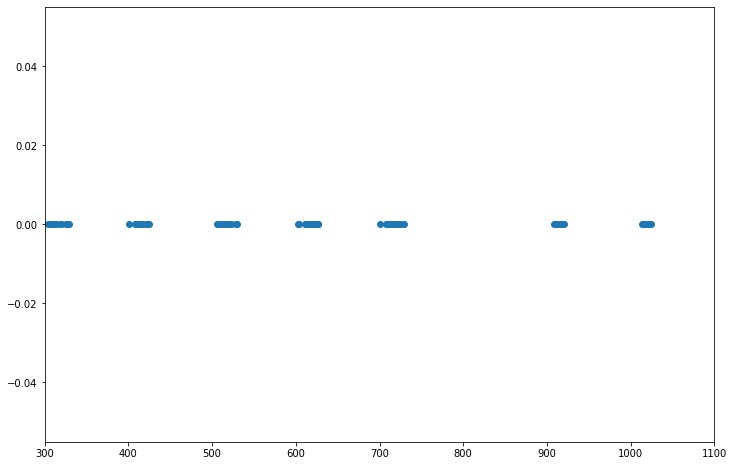

In [59]:
val = 0
plt.figure(figsize = (12,8))
plt.scatter(datesss,np.zeros_like(datesss))
plt.xlim(300,1100)
plt.show()

In [62]:
len(dates[dates<=20020801])

76